## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [2]:
dataset = pd.read_csv("./titanic.csv")

In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>1. Є багато пропущених значень у колонці Age (177). Вік можна заповнити медіанним значенням.
<br/>2. Пропущено 2 значення у колонці Embarked. Оскільки датасет містить майже 900 рядків, 2 пропуски не вплинуть на результати аналізу. 
<br/>3. Велика кількість значень відсутня у колонці Cabin (687). Такі пропуски заповнити оптимальними значеннями не вдасться.

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



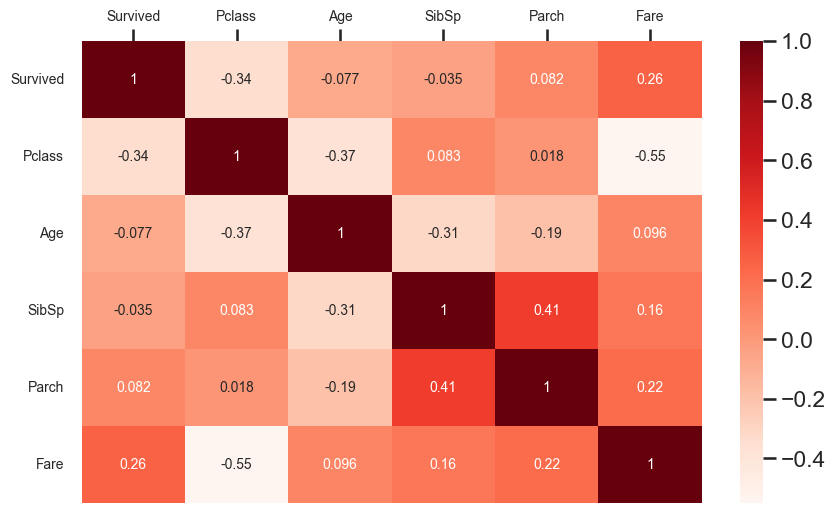

In [7]:
num_data = dataset.select_dtypes(include=['number']).drop(["PassengerId"], axis="columns")
corr_coefficients = num_data.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_coefficients, annot=True, cmap='Reds', ax=ax, annot_kws={'size': 10})
ax.tick_params(labelsize=10)
ax.xaxis.tick_top()

<font color='#F5E398'><b>Ваші висновки:</b></font>
<br/>
Найсильніші зв'язки мають такі пари атрибутів:
<br/>1. Pclass та Fare (-0.55), Pclass та Age (-0.37), Pclass та Survived (-0.34).
<br/>2. SibSp та Parch (0.41), SibSp та Age (-0.31).
<br/>3. Fare та Survived (0.26).
<br/>
Інші пари мають низький коефіцієнт кореліяції, що свідчить про слабкий зв'язок і відсутність залежності. Такі пари не будуть корисними під час аналізу.

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [17]:
def process_col(df, col_name: str, group_col):
    df_copy = df.copy()
    df_copy[col_name] = df_copy.groupby(group_col)[col_name].transform(lambda x: x.fillna(x.median()))
    return df_copy

display(dataset.head(10))
filled_dataset = process_col(dataset, "Age", ["Pclass", "Sex"])
display(filled_dataset.head(10))

median_before = dataset["Age"].median()
median_after = filled_dataset["Age"].median()
print(f"Median before filling: {median_before}")
print(f"Median after filling: {median_after}")
display(filled_dataset.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Median before filling: 28.0
Median after filling: 26.0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<font color='#F5E398'><b>Ваші висновки:</b></font> за допомогою використання функції ми отримали датасет із заповненою колонкою Age, яка тепер не містить пропущених значень, що дозволятиме використовувати даний атрибут під час подальшого аналізу. Ми використали для заповнення медіану, а не середнє значення, оскільки на неї не впливають аномальні значення, тому пропущенні значення заповняться правильно.
<br/> Медіаною по віку до заповнення було значення 28, а після заповнення - 26. Це свідчить про те, що пропуски були заповнені вірно і це несильно вплинуло на початкові показники.

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





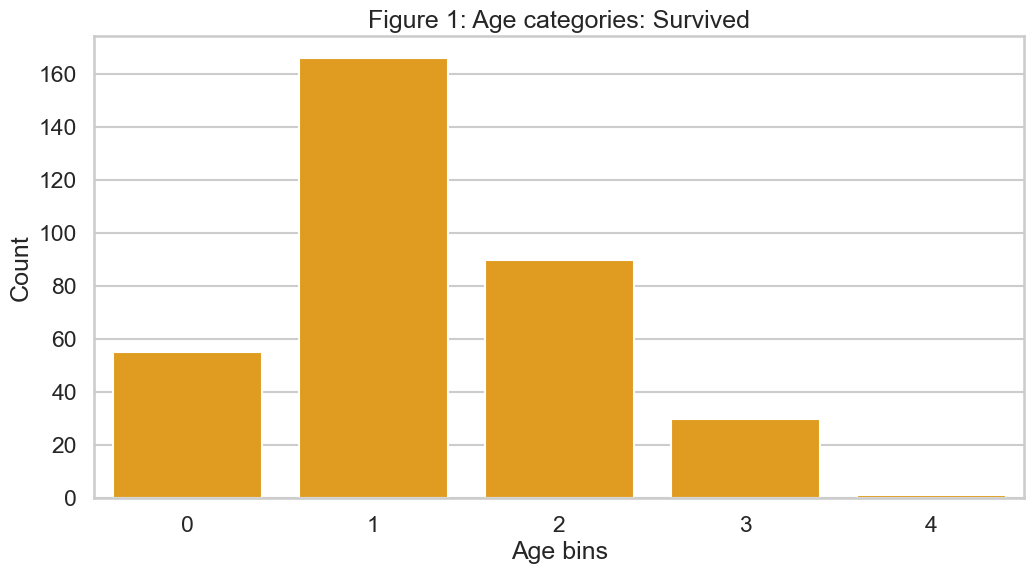

Асиметрія: 0.5340834483875482. Розподіл має важчий правий хвіст.


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_bin          0
dtype: int64

In [18]:
age_bins = [0, 16, 32, 48, 64, 80]
age_categories = [0, 1, 2, 3, 4]

processed_dataset = filled_dataset.copy()
processed_dataset["Age_bin"] = pd.cut(processed_dataset["Age"], age_bins, labels=age_categories)

fig, ax = plt.subplots(figsize=(12, 6))

sns.countplot(data=processed_dataset.loc[processed_dataset["Survived"] == 1, ["Age_bin"]], ax=ax, color='orange', x="Age_bin")

ax.set_xlabel("Age bins")
ax.set_ylabel("Count")
ax.set_title("Figure 1: Age categories: Survived")

plt.show()

skewness = processed_dataset["Age"].skew()
if skewness > 0:
    print(f"Асиметрія: {skewness}. Розподіл має важчий правий хвіст.")
elif skewness < 0:
    print(f"Асиметрія: {skewness}. Розподіл має важчий лівий хвіст.")
else:
    print("Розподіл симетричний.")

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>1. Графік має важчий правий хвіст, що говорить про те, що люди віком від 32 до 80 років мали гіршу статистику виживаня за молодших людей.
<br/>2. Найбільше людей вижило з 1 вікової категорії (від 16 до 32 років), більше 175.
<br/>3. Найменше вижило людей в останній 4 віковій категорії (від 64 до 80 років).

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

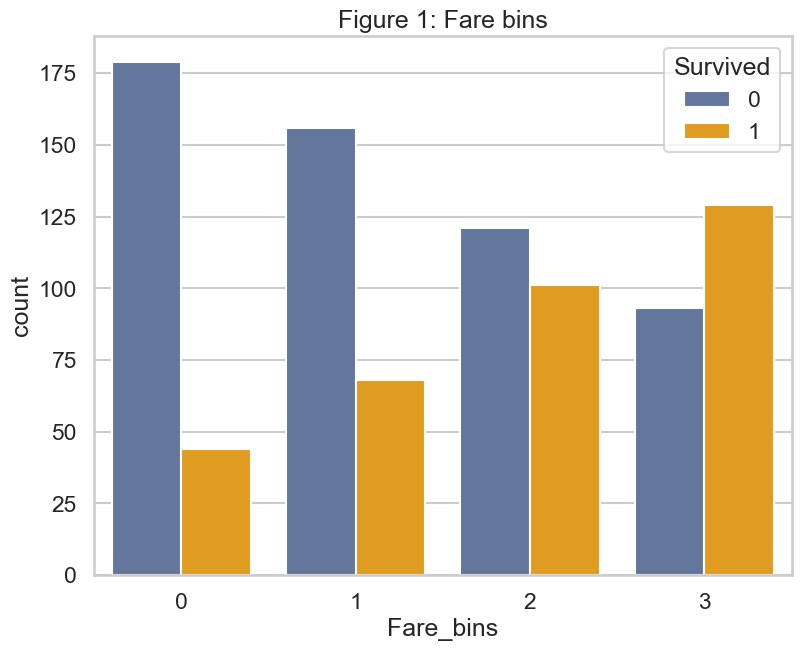

In [19]:
processed_dataset['Fare_bins'] = pd.qcut(processed_dataset['Fare'], 4, labels=[0, 1, 2, 3])

fig, ((ax1)) = plt.subplots(1, 1, figsize=(9, 7))
sns.countplot(data = processed_dataset, x = "Fare_bins", hue = "Survived", palette=['#5975A4', 'orange'], ax=ax1)
ax1.set_title("Figure 1: Fare bins")

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>З графіку видно, що чим більш дорогими є квитки пасажирів, тим більша їхня ймовірність на виживання. Тобто пасажири, які мали найдорожчі квитки (категорії 3), мали більші шанси на виживання. І навпаки, пасажири, які мали дешеві квитки (категорії 0), переважно загинули. З цього можна зробити висновок, що між ціною квитка та ймовірністю виживання пасажира є зв'язок.
<br/>Також, побудувавши матрицю кореляції, ми побачили, що ця пара атрибутів має непоганий зв'язок (0.26), тому для подальшого аналізу нам може бути корисним кодування на цю змінну.

***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежіть від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

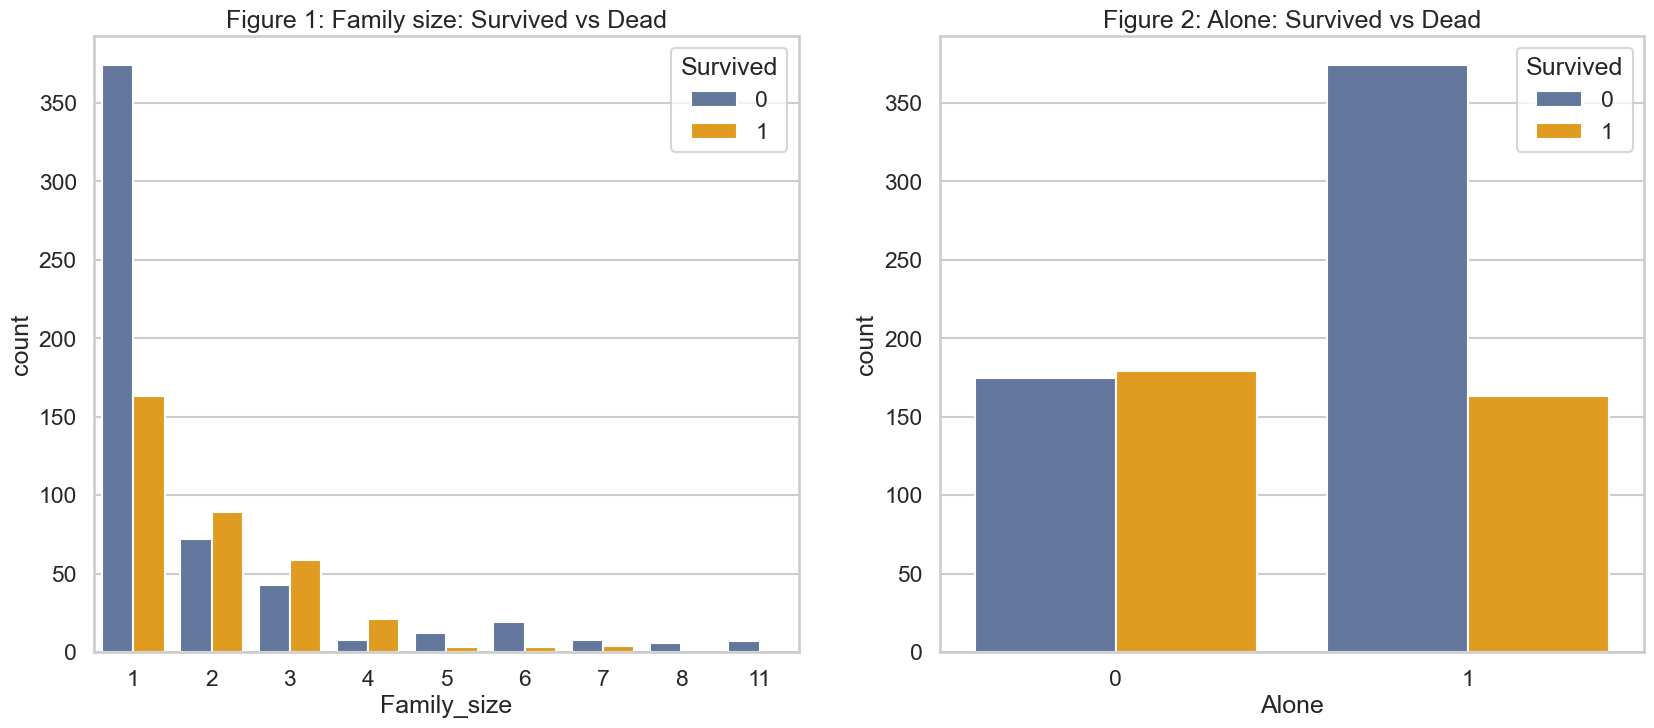

In [20]:
processed_dataset["Family_size"] = processed_dataset["Parch"] + processed_dataset["SibSp"] + 1
processed_dataset["Alone"] = processed_dataset.apply(lambda row: 1 if row["Family_size"] == 1 else 0, axis=1)

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(data = processed_dataset, x = "Family_size", hue="Survived", ax=ax1, palette=['#5975A4', 'orange'])
sns.countplot(data = processed_dataset, x = "Alone", hue="Survived", ax=ax2, palette=['#5975A4', 'orange'])

ax1.set_title("Figure 1: Family size: Survived vs Dead")
ax2.set_title("Figure 2: Alone: Survived vs Dead")

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>
Перший графік:
<br/>1. Найбільша сім'я складається з 11 людей.
<br/>2. Пасажирів, які приїхали з родиною, було менше за пасажирів, які подорожували наодинці. 
<br/>3. 
<br/><br/>
Другий графік:
<br/>1. Кількість виживших людей серед тих, що мали родину, приблизно дорівнює кількості загинувших людей.
<br/>2. Кількість загинувших людей, які подорожували окремо, набагато більша за кількість виживших. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [21]:
processed_dataset = processed_dataset.drop(["Cabin", "Ticket", "PassengerId"], axis="columns")
display(processed_dataset.head(5))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Fare_bins,Family_size,Alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3,2,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3,2,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1,1,1


<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>1. Атрибут ***Cabin*** необхідно видалити, адже в ньому переважна кількість значень пропущена і заповнити таку колонку оптимальними значеннями не вийде. 
<br/>2. Колонка ***Ticket*** не буде корисною для аналізу, оскільки вона відповідає за номер квитка, а таку інформацію також не буде як використати. 
<br/>3. Атрибут ***PassengerId*** також необхідно видалити, оскільки він унікальний для кожного пасажира і в аналізі не матиме цінності.
<br/>4. Атрибут ***Name*** містить лише унікальні значення, і в аналізі навряд чи знадобиться, проте з імені можна витягти титул, який буде корисним. Додатково, можна визначити найпопулярніші жіночі/чоловічі імена. Через це дану колонку з датасету я не прибирала.

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [22]:
processed_dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in processed_dataset["Name"]]

num_df = processed_dataset.copy()

all_titles = num_df['Title'].unique()

titles_map = {}
for ind, value in enumerate(all_titles):
    titles_map[value] = ind

sex_map = {"female": 1, "male": 0}
embarked_map = {"S": 0, "Q": 1, "C": 2}

num_df["Title"] = num_df["Title"].map(titles_map)
num_df["Sex"] = num_df["Sex"].map(sex_map)
num_df["Embarked"] = num_df["Embarked"].map(embarked_map)

display(num_df.head(10))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Fare_bins,Family_size,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0.0,1,0,2,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2.0,2,3,2,0,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0.0,1,1,1,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0.0,2,3,2,0,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0.0,2,1,1,1,0
5,0,3,"Moran, Mr. James",0,25.0,0,0,8.4583,1.0,1,1,1,1,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,51.8625,0.0,3,3,1,1,0
7,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,21.0750,0.0,0,2,5,0,3
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,11.1333,0.0,1,1,3,0,1
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,30.0708,2.0,0,2,2,0,1


<font color='#F5E398'><b>Ваші висновки:</b></font>
<br/>1. Категоріям female та male в колонці Sex присвоєні значення 1 та 0 відповідно.
<br/>2. Категоріям S, Q та C в колонці Embarked присвоєні значення 0, 1 та 2 відповідно.
<br/>3. Категоріям з колонки Title (значення якої були витягнуті з колонки Name і відповідають за титули пасажирів) присвоєні значення від 0 до 16.
<br/>
Такі перетворення даних були проведенні для того, щоб ці колонки могли бути використані моделями машинного навчання, оскільки вони навчаються на числових значеннях, а в нас були рядкові.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



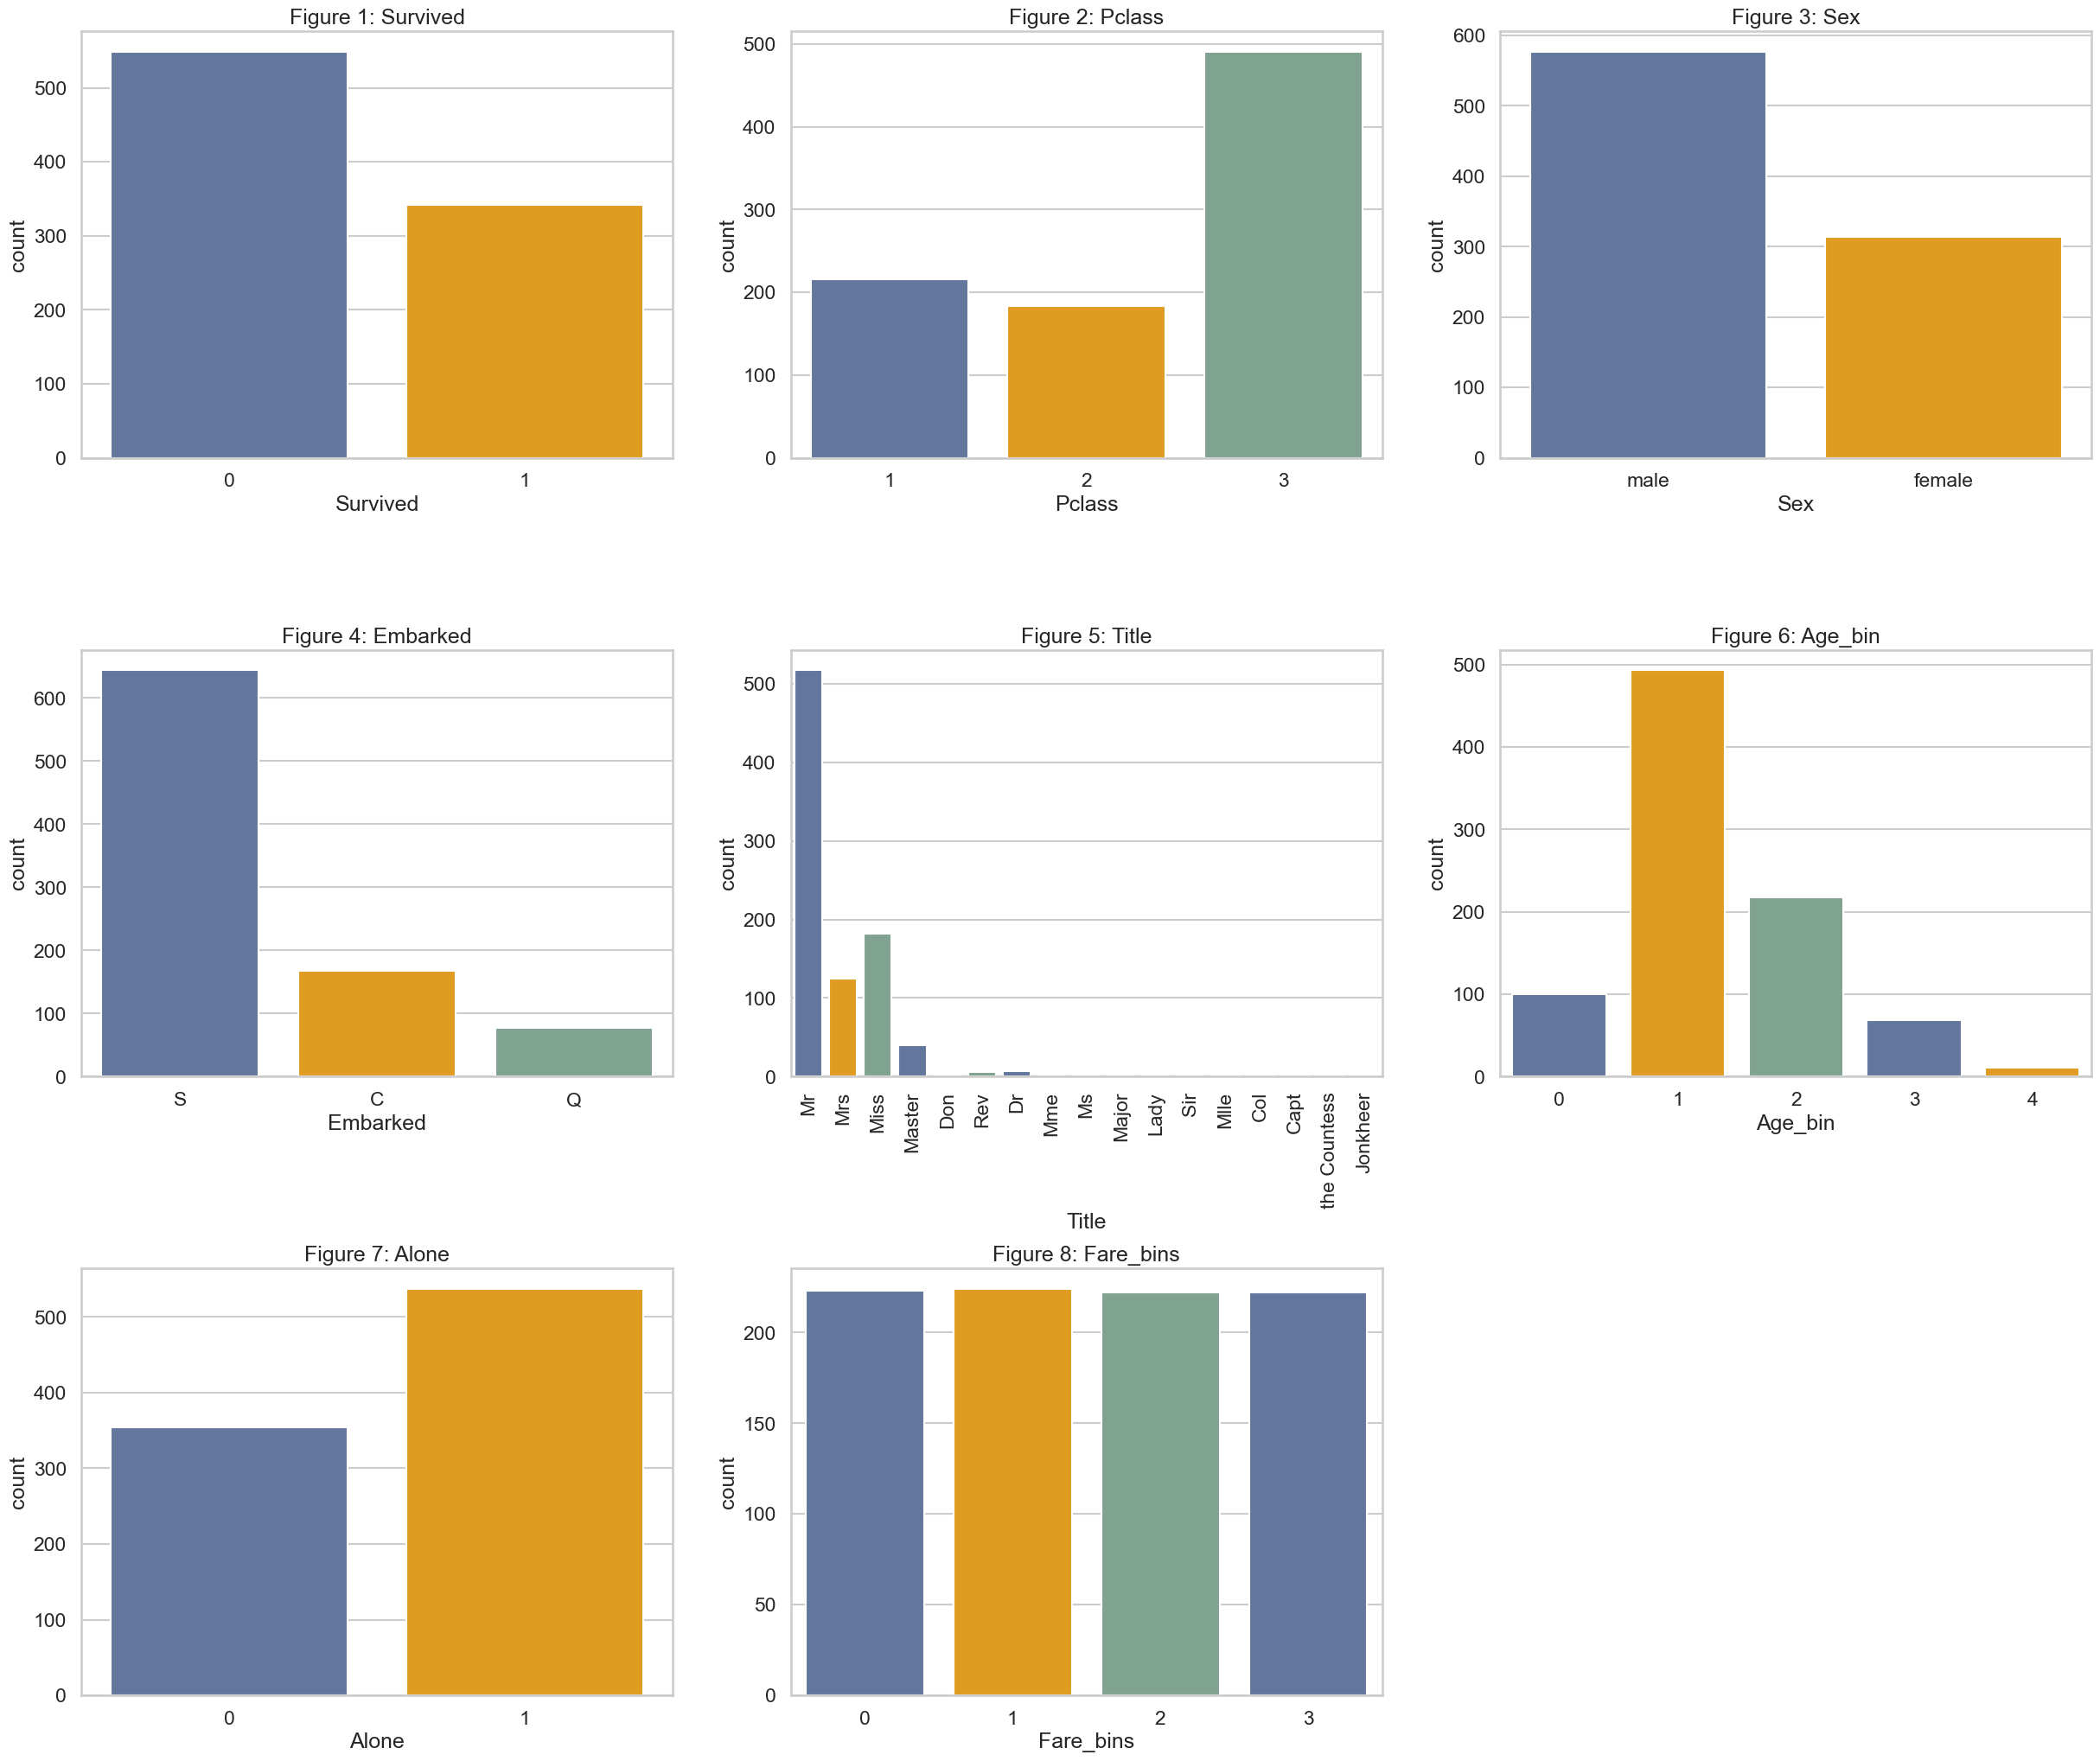

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Fare_bins,Family_size,Alone,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,3,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,3,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,1,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,1,1,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,2,1,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,23.4500,S,1,2,4,0,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,2,1,1,Mr


In [23]:
# display(processed_dataset.head(1))

category_df = processed_dataset[["Survived", "Pclass", "Sex", "Embarked", "Title", "Age_bin", "Alone", "Fare_bins"]]

# display(category_df.head(1))

fig = plt.figure(figsize=(30,25))
plt.subplots_adjust(hspace=0.45)

for ind, value in enumerate(category_df):
    ax = plt.subplot(3, 3, ind+1)
    sns.countplot(data=category_df, x=value, ax=ax, palette=['#5975A4', 'orange', '#7AA88F'])  
    if value == "Title":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f"Figure {ind+1}: {value}")

plt.show()

display(processed_dataset)

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>
Категоріальні змінні містяться в таких колонках: Survived, Pclass, Sex, Embarked, Title, Age_bin, Alone.
<br/>1. **Survived**: зображення кількості виживших (1) та загинувших (0) пасажирів. Кількість загинувших значно переважає над кількістю виживших.
<br/>2. **Pclass**: зображення кількості пасажирів відповідно до їхнього класу - 1, 2 та 3. Кількість пасажирів третього класу значно переважає над першим та другим, оскільки квитки цього класу були найдешевшими.
<br/>3. **Sex**: зображення кількості жінок та чоловіків на Титаніку. Кількість чоловіків значно більша за кількість жінок. 
<br/>4. **Embarked**: зображення кількості пасажирів відповідно до місця їхньої посадки. Атрибут містить три категорії - C (Cherbourg), Q (Queenstown) та S (Southampton). Кількість людей, які сидали в порту Southampton, є найбільшою серед усіх. Найменше людей сіло в порті Queenstown.
<br/>5. **Title**: зображення кількості всіх титулів пасажирів. Загалом, атрибут містить 17 категорій. Для чоловіків найпоширенішим титулом є Mr, а для жінок - Miss. Це свідчить про те, що переважна кількість жінок була незаміжня, проте про чоловіків ми нічого не можемо сказати, оскільки Mr вживається незалежно від сімейного статусу.
<br/>6. **Age bin**: зображення кількості людей залежно від їхньої вікової категорії. Колонка містить 5 категорій, від 0 до 80 років. Найбільше людей було віком від 16 до 32 років, що є категорією 1, а найменше - віком від 64 до 80 (4 категорія). 
<br/>7. **Alone**: зображення кількості людей залежно від того, подорожували вони з родиною чи окремо. З графіку видно, що переважно люди подорожували наодинці.
<br/>8. **Fare_bins**: зображення кількості квитків кожної категорії. З графіку видно, що кількість квитків в кожній категорії приблизно однакова, проте квитки 1 категорії мають зовсім трохи більшу кількість.

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

Асиметрія графіку 1: 0.5340834483875482. Розподіл має важчий правий хвіст.
Асиметрія графіку 2: 3.6953517271630565. Розподіл має важчий правий хвіст.
Асиметрія графіку 3: 2.7491170471010933. Розподіл має важчий правий хвіст.
Асиметрія графіку 4: 4.787316519674893. Розподіл має важчий правий хвіст.
Асиметрія графіку 5: 2.7274414739308535. Розподіл має важчий правий хвіст.


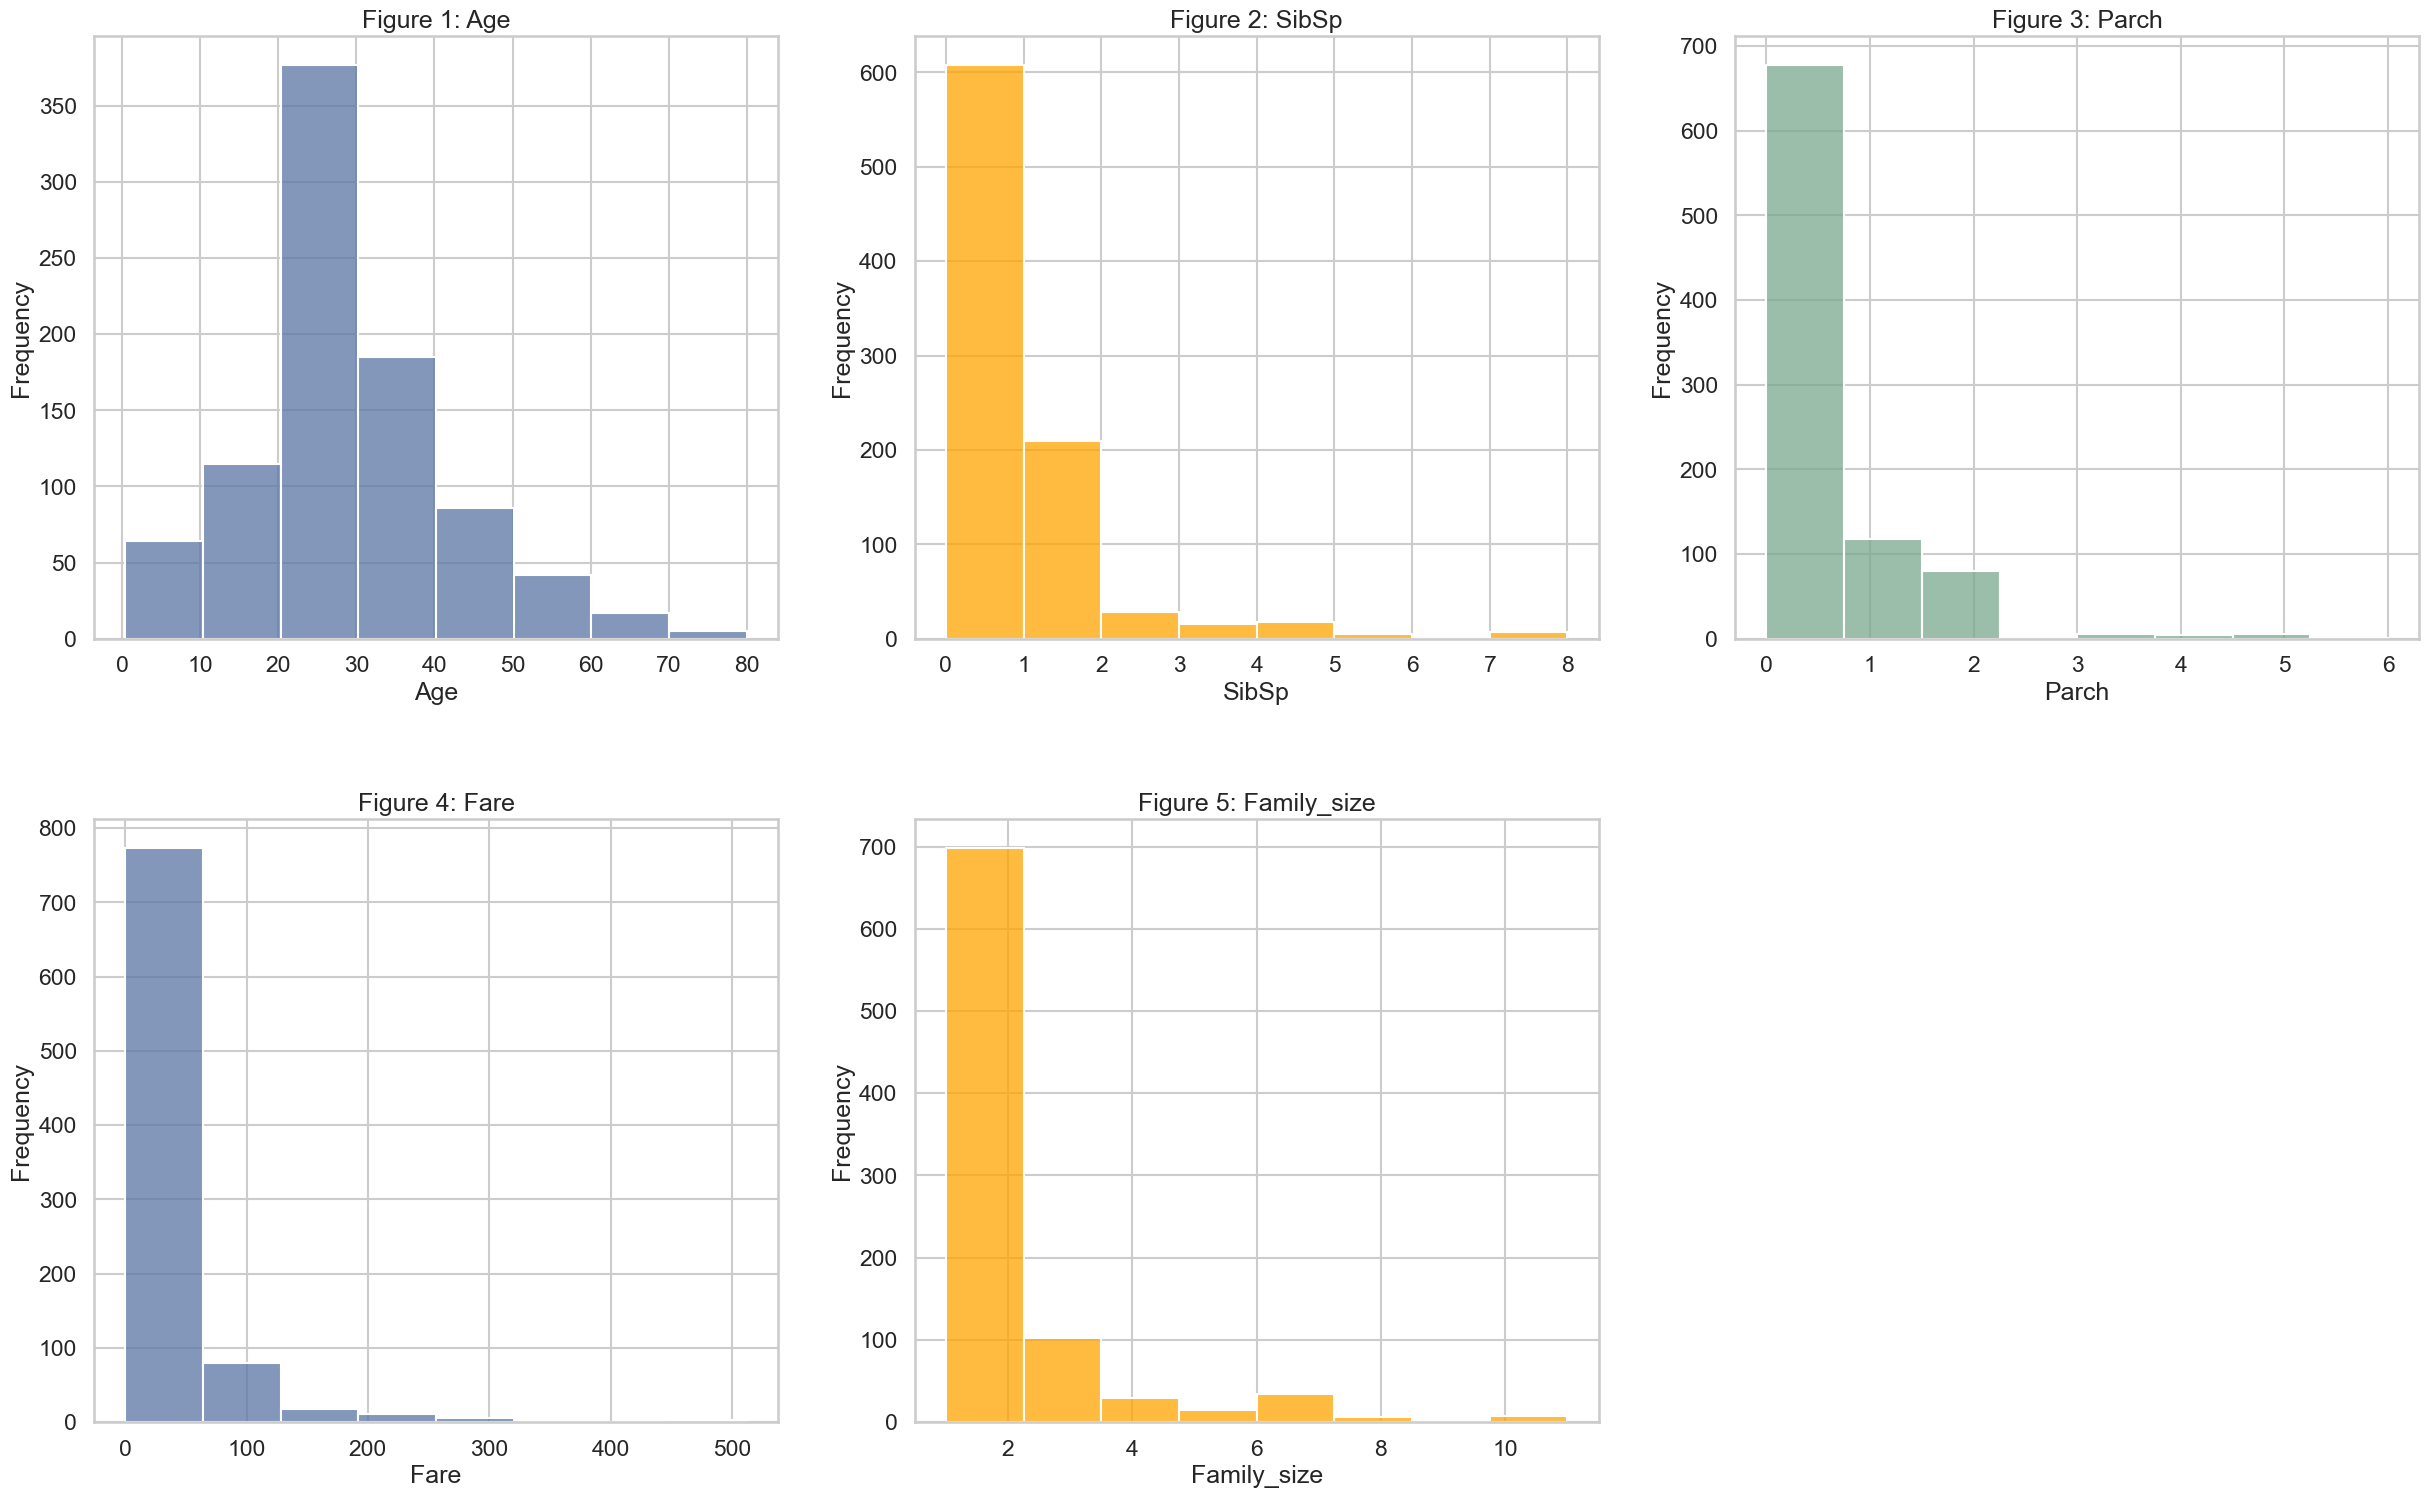

In [24]:
# display(processed_dataset.head(1))

numerical_df = processed_dataset[["Age", "SibSp", "Parch", "Fare", "Family_size"]]

# display(numerical_df.head(1))

fig = plt.figure(figsize=(30,18))
plt.subplots_adjust(hspace=0.3)

palette=['#5975A4', 'orange', '#7AA88F']

def check_skew(sk, ind):
    if sk > 0:
        print(f"Асиметрія графіку {ind+1}: {sk}. Розподіл має важчий правий хвіст.")
    elif sk < 0:
        print(f"Асиметрія графіку {ind+1}: {sk}. Розподіл має важчий лівий хвіст.")
    else:
        print("Розподіл симетричний.")

for ind, value in enumerate(numerical_df):
    ax = plt.subplot(2, 3, ind+1)
    sns.histplot(data=numerical_df, x=value, ax=ax, bins=8, color=palette[ind % len(palette)])  
    ax.set_title(f"Figure {ind+1}: {value}")
    ax.set_ylabel("Frequency")
    skewness = numerical_df[value].skew()
    check_skew(skewness, ind)

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>
Числові змінні містяться в таких колонках: Age, SibSp, Parch, Fare, Family_size.
<br/>1. **Age**: розподіл віку пасажирів. Графік має розподіл, наближений до нормального, з важчим правим хвостом. Це свідчить про те, що людей молодшого віку було більше за людей більш старшого. Найбільше людей було віком від 20 до 30 років. Найменше було людей віком від 70 до 80 років.
<br/>2. **SibSp**: розподіл кількості родичів у пасажирів. Графік має розподіл, наближений до розподілу Пуассона, оскільки кількість значень по х є дискретною. Більша кількість людей була без родичів. Зі збільшенням кількості родичів зменшувалась кількість людей. 
<br/>3. **Parch**: розподіл кількості батьків/дітей у пасажирів. Графік має розподіл, наближений до розподілу Пуассона, оскільки кількість значень по х є дискретною. Аналогічно до попереднього розподілу, переважна кількість людей була без батьків або дітей і зі збільшенням кількості батьків/дітей зменшувалась кількість відповідних пасажирів.
<br/>4. **Fare**: розподіл ціни за квиток у пасажирів. Можна припустити, що графік має розподіл, наближений до нормального, з важчим правим хвостом. Це свідчить про те, що зі збільшенням ціни на квиток кількість пасажирів, яка його придбала, зменшувалась. Максимальна ціна квитків досягає 500 доларів.
<br/>5. **Family_size**: розподіл кількості людей в родині кожного пасажира. Графік має розподіл, наближений до розподілу Пуассона, оскільки кількість значень по х є дискретною. Кількість людей в родині складала від 1 до 11. Кількість людей, яка подорожувала самостійно, переважала над людьми з родиною. 

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

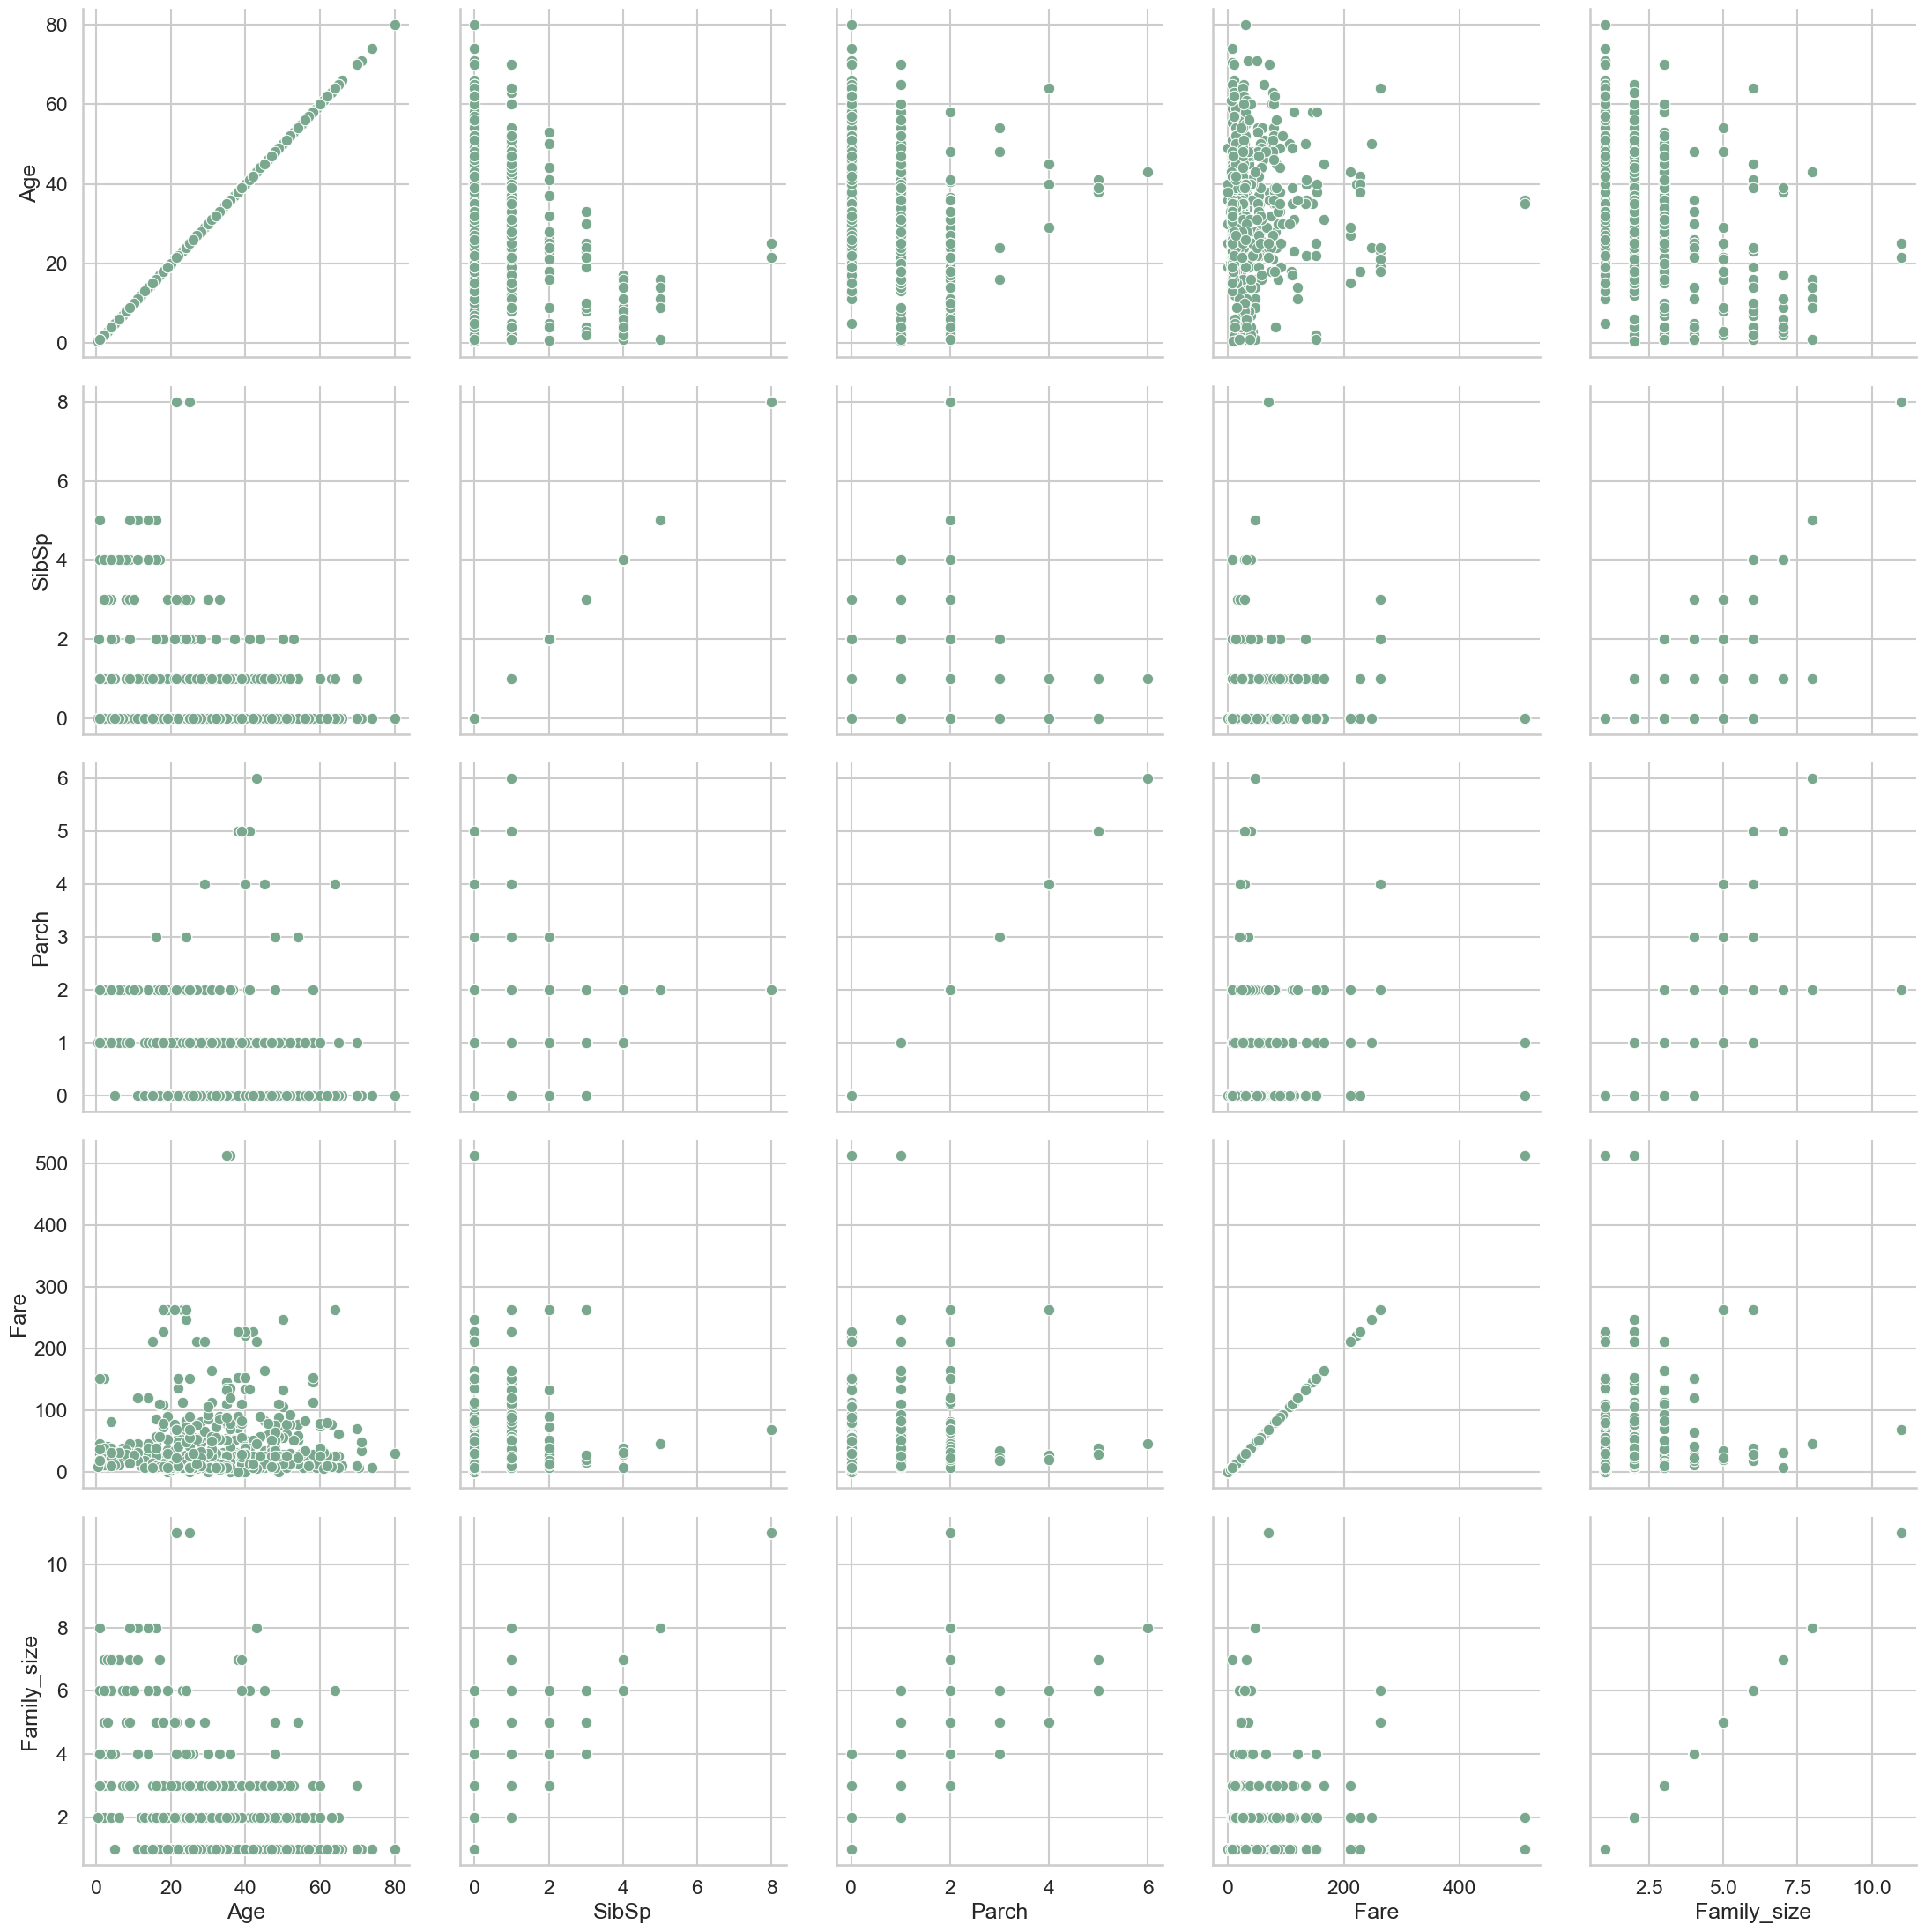

In [25]:
numerical_pairs_matrix = sns.PairGrid(numerical_df, height=4.5)
numerical_pairs_matrix.map(sns.scatterplot, color='#7AA88F')

plt.show()

<font color='#F5E398'><b>Ваші висновки:</b></font> 
<br/>

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.